In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv('nbastats.csv')


G (Games Played):   - number of games played by the player
GS (Games Started):   - number of games started by the player
MP (Minutes Played):   - total minutes played by the player
FG (Field Goals)- number of field goals made by the player
FGA (Field Goal Attempts) - number of field goal attempts by the player
FG% (Field Goal Percentage):    - percentage of field goals made by the player
3P (3-Point Field Goals):   - number of 3-point field goals made by the player
3PA (3-Point Field Goal Attempts):   - number of 3-point field goal attempts by the player
3P% (3-Point Field Goal Percentage):    - percentage of 3-point field goals made by the player
2P (2-Point Field Goals):   - number of 2-point field goals made by the player
2PA (2-point Field Goal Attempts):   - number of 2-point field goal attempts by the player
2P% (2-Point Field Goal Percentage):    - percentage of 2-point field goals made by the player
eFG% (Effective Field Goal Percentage):    - effective field goal percentage of the player
FT (Free Throws):   - number of free throws made by the player
FTA (Free Throw Attempts):   - number of free throw attempts by the player
FT% (Free Throw Percentage):    - percentage of free throws made by the player
ORB (Offensive Rebounds):   - number of offensive rebounds by the player
DRB (Defensive Rebounds):   - number of defensive rebounds by the player
TRB (Total Rebounds):   - total rebounds by the player
AST (Assists):   - number of assists made by the player
STL (Steals):   - number of steals made by the player
BLK (Blocks):   - number of blocks made by the player
TOV (Turnovers):   - number of turnovers made by the player
PF (Personal Fouls):   - number of personal fouls made by the player
PTS (Points):   - total points scored by the player
* after name = he is a Hall of Famer (https://en.wikipedia.org/wiki/List_of_players_in_the_Naismith_Memorial_Basketball_Hall_of_Fame)

Gasire campuri cu missing values

In [2]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       2198
2P           0
2PA          0
2P%        154
eFG%        88
FT           0
FTA          0
FT%        749
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Season       0
MVP          0
dtype: int64


Toate campurile lipsa sunt procentaje, sunt missing values deoarece jucatorul nu are nici o aruncare din categoria respectiva ( a jucat foarte putine minute )
De aceea se pot completa cu 0

In [3]:
df['FG%'].fillna(0, inplace=True)
df['3P%'].fillna(0, inplace=True)
df['2P%'].fillna(0, inplace=True)
df['eFG%'].fillna(0, inplace=True)
df['FT%'].fillna(0, inplace=True)

C:\Users\Iulian\AppData\Local\Temp\ipykernel_6404\900043586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FG%'].fillna(0, inplace=True)
C:\Users\Iulian\AppData\Local\Temp\ipykernel_6404\900043586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [4]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Season    0
MVP       0
dtype: int64


Jucatorii care au doar 1 meci jucat sau au mai putin de 1 minut average jucat pot fi considerati anomalii

In [5]:
df_filtered = df[df['G'] > 1]
df_filtered = df_filtered[df_filtered['MP'] >= 1]


Transformare din True si False in 1 si 0

In [6]:
df['MVP'] = df['MVP'].astype(int)
df['MVP'] = df['MVP'].replace({'True': 1, 'False': 0})
print(df.head())

   Rk               Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  DRB  \
0   1   Mahmoud Abdul-Rauf  PG   28  SAC  31   0  17.1  3.3   8.8  ...  1.0   
1   2    Tariq Abdul-Wahad  SG   23  SAC  59  16  16.3  2.4   6.1  ...  1.2   
2   3  Shareef Abdur-Rahim  SF   21  VAN  82  82  36.0  8.0  16.4  ...  4.3   
3   4       Cory Alexander  PG   24  TOT  60  22  21.6  2.9   6.7  ...  2.2   
4   4       Cory Alexander  PG   24  SAS  37   3  13.5  1.6   3.9  ...  1.1   

   TRB  AST  STL  BLK  TOV   PF   PTS   Season  MVP  
0  1.2  1.9  0.5  0.0  0.6  1.0   7.3  1997-98    0  
1  2.0  0.9  0.6  0.2  1.1  1.4   6.4  1997-98    0  
2  7.1  2.6  1.1  0.9  3.1  2.5  22.3  1997-98    0  
3  2.4  3.5  1.2  0.2  1.9  1.6   8.1  1997-98    0  
4  1.3  1.9  0.7  0.1  1.3  1.4   4.5  1997-98    0  

[5 rows x 32 columns]


Stergere * din numa ( reprezinta membrii din Hall of Fame, premium acordat jucatorilor legendari dupa retragere )

In [7]:
df['Player'] = df['Player'].str.rstrip('*')

In [8]:
df.corr(numeric_only=True)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
Rk,1.000000,-0.045245,-0.047194,-0.039766,-0.029845,-0.007366,-0.007961,0.009589,0.012412,0.018469,...,-0.029955,-0.011646,-0.018631,0.006168,-0.020428,-0.008842,-0.009217,-0.025242,-0.010530,-0.012298
Age,-0.045245,1.000000,0.035951,0.043532,0.093326,0.010772,0.018025,-0.006070,0.065222,0.050970,...,-0.019724,0.064084,0.039968,0.098077,0.043461,-0.019892,0.017241,0.062690,0.014508,0.003651
G,-0.047194,0.035951,1.000000,0.648261,0.623975,0.531373,0.508865,0.294640,0.296636,0.278043,...,0.342314,0.476754,0.459453,0.363731,0.452040,0.291432,0.443324,0.514781,0.522562,0.047719
GS,-0.039766,0.043532,0.648261,1.000000,0.794120,0.734992,0.714500,0.224346,0.356668,0.348973,...,0.440254,0.652642,0.619527,0.534624,0.592471,0.391438,0.650691,0.571263,0.724283,0.082855
MP,-0.029845,0.093326,0.623975,0.794120,1.000000,0.895629,0.901854,0.263342,0.531919,0.538459,...,0.457966,0.741689,0.689925,0.677912,0.760200,0.385371,0.809594,0.718361,0.892639,0.071262
FG,-0.007366,0.010772,0.531373,0.734992,0.895629,1.000000,0.979802,0.314184,0.530590,0.532726,...,0.433121,0.718668,0.665001,0.643298,0.672606,0.369971,0.826087,0.606987,0.989703,0.128136
FGA,-0.007961,0.018025,0.508865,0.714500,0.901854,0.979802,1.000000,0.191537,0.600205,0.618180,...,0.343854,0.660511,0.593268,0.681270,0.697065,0.292657,0.836994,0.575431,0.980942,0.113092
FG%,0.009589,-0.006070,0.294640,0.224346,0.263342,0.314184,0.191537,1.000000,-0.010546,-0.064056,...,0.387589,0.347033,0.380011,0.068171,0.146818,0.327811,0.187721,0.343425,0.278278,0.028522
3P,0.012412,0.065222,0.296636,0.356668,0.531919,0.530590,0.600205,-0.010546,1.000000,0.980225,...,-0.205189,0.192508,0.071872,0.477858,0.434809,-0.104908,0.396003,0.176764,0.589189,0.053029
3PA,0.018469,0.050970,0.278043,0.348973,0.538459,0.532726,0.618180,-0.064056,0.980225,1.000000,...,-0.217692,0.190660,0.066407,0.503454,0.456709,-0.113837,0.419038,0.171149,0.591566,0.050654


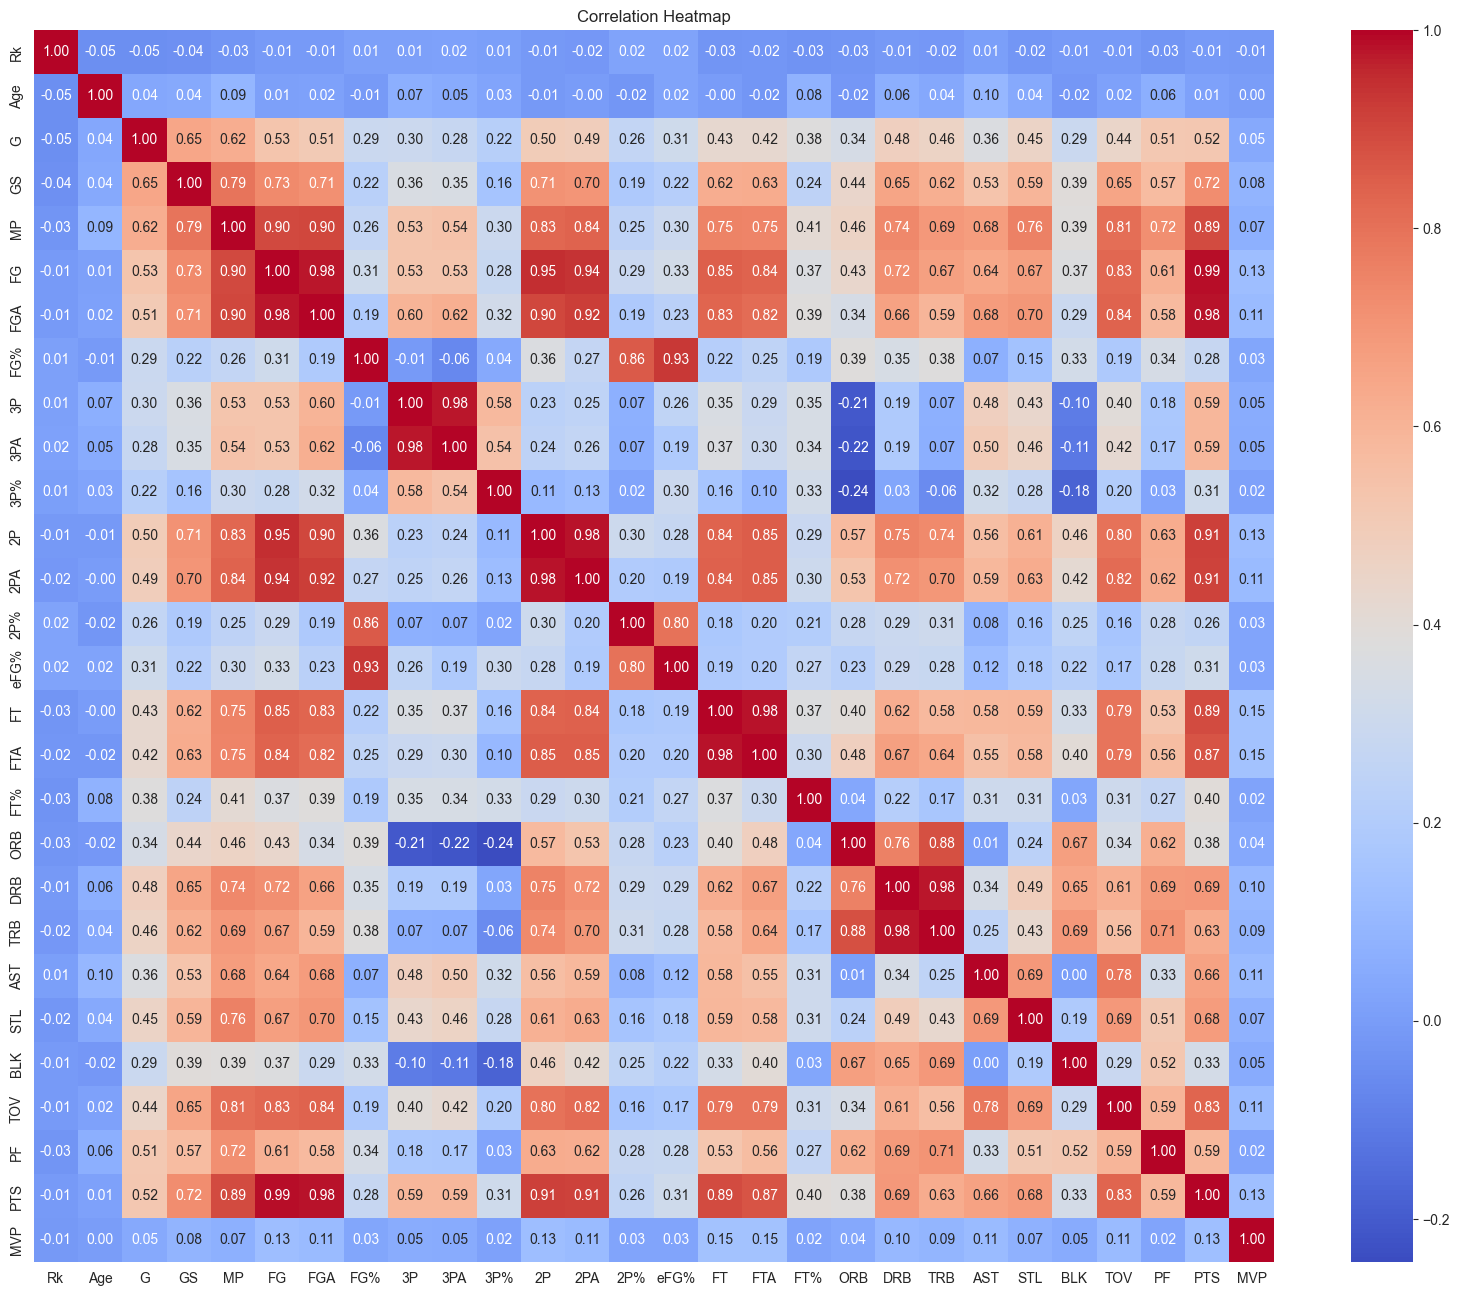

In [9]:



# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

#plot
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Corelatii intre FG FGA , 2P 2PA ... pentru ca masoara acelasi stat mai mult sau mai putin unul reprezinta aruncarile reusite , celalalt aruncarile incercate de la o anumita distanta , inside the arc , 3 pointer , free throw
Corelatie intre Field goals attempted si toate tipurile de aruncari
Total Rebounds si Offensive/Defensive Rebounds

FGA ( field goals attempted ) are corelatie cu toate stats-urile legate de aruncari

In [10]:


entropies = {}
for column in df.columns:
    #Skip non-numeric columns
    if df[column].dtype == 'object':
        continue

    
    value_counts = df[column].value_counts(normalize=True)
    probabilities = value_counts.values

   
    entropy = -np.sum(probabilities * np.log2(probabilities))

  
    entropies[column] = entropy


for column, entropy in entropies.items():
    print(f"Entropy for {column}: {entropy}")


Entropy for Rk: 9.005042710496605
Entropy for Age: 4.052475451727115
Entropy for G: 6.270871138424956
Entropy for GS: 5.092080278694366
Entropy for MP: 8.51980528076983
Entropy for FG: 6.1917156891442735
Entropy for FGA: 7.284375979393417
Entropy for FG%: 8.047683545044297
Entropy for 3P: 3.878876892410925
Entropy for 3PA: 5.261190078768143
Entropy for 3P%: 6.367862957088612
Entropy for 2P: 5.918635452421754
Entropy for 2PA: 6.913624607361787
Entropy for 2P%: 8.037377043929512
Entropy for eFG%: 8.081790284928887
Entropy for FT: 5.256131468237285
Entropy for FTA: 5.632063651134477
Entropy for FT%: 8.072528116937157
Entropy for ORB: 4.636758131995784
Entropy for DRB: 5.927821741842318
Entropy for TRB: 6.36498612301156
Entropy for AST: 5.582304127200074
Entropy for STL: 4.0020533894852734
Entropy for BLK: 3.5511265720317247
Entropy for TOV: 4.793406135351998
Entropy for PF: 5.039907851421589
Entropy for PTS: 7.588436720778714
Entropy for MVP: 0.018233395579560704


In [34]:
df['Total_PRA'] = df['PTS'] + df['TRB'] + df['AST'] + df['eFG%']
y_regression = df['Total_PRA']
min_total_pra = y_regression.min()
max_total_pra = y_regression.max()


print(f"Range of Total_PRA: {min_total_pra} to {max_total_pra}")


print(f"Mean of Total_PRA: {y_regression.mean()}")
print(f"Standard deviation of Total_PRA: {y_regression.std()}")


Range of Total_PRA: 0.0 to 53.175999999999995
Mean of Total_PRA: 13.511749811294859
Standard deviation of Total_PRA: 8.800221297835284


Testare modele prin antrenarea cu toate coloanele statisticile

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

X = df[['PTS', 'AST', 'TRB', 'eFG%']]
y = df['PTS'] + df['TRB'] + df['AST'] + df['eFG%']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'KNN Regressor' : KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} Mean Squared Error: {mse :.4f}")
    print(f"{name} Mean Absolute Error: {mae :.4f}\n")





Decision Tree Regressor Mean Squared Error: 0.2860
Decision Tree Regressor Mean Absolute Error: 0.3316
Random Forest Regressor Mean Squared Error: 0.0949
Random Forest Regressor Mean Absolute Error: 0.1596

KNN Regressor Mean Squared Error: 0.1922
KNN Regressor Mean Absolute Error: 0.2853
MLP Regressor Mean Squared Error: 0.0028
MLP Regressor Mean Absolute Error: 0.0373


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression




X = df.drop(columns=['MVP','Player','Pos','Tm','Season'])
y = df['MVP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier()
    
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    
    

    print(f"{name} Accuracy: {accuracy * 100 :.4f} %")


Decision Tree Accuracy: 99.6913 %
Random Forest Accuracy: 99.8628 %
Naive Bayes Accuracy: 93.4134 %
Logistic Regression Accuracy: 99.8971 %
KNN Accuracy: 99.8628 %
MLP Classifier Accuracy: 99.7599 %


Testare modele prin antrenarea cu cele mai importante statistici

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier



X = df[['PTS', 'AST', 'TRB', 'eFG%']]
y = df['MVP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier()

}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)


    print(f"{name} Accuracy: {accuracy * 100 :.4f} %")


Decision Tree Accuracy: 99.7599 %
Random Forest Accuracy: 99.8628 %
Naive Bayes Accuracy: 98.2161 %
Logistic Regression Accuracy: 99.7942 %
KNN Accuracy: 99.8628 %
MLP Classifier Accuracy: 99.8628 %


In [72]:
from sklearn.linear_model import LogisticRegression



X_regression = df[['PTS', 'TRB', 'AST', 'eFG%' ]] 
y_regression = df['MVP']


X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)


y_pred_proba = logistic_regression.predict_proba(X_test_scaled)[:, 1]  # Probabilitatea clasei 1 (MVP)

threshold = 0.5
y_pred_logistic_regression_binary = (y_pred_proba >= threshold).astype(int)

accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression_binary)

print("\nLogistic Regression:")

print(f"Accuracy for Logistic Regression: {accuracy_logistic_regression * 100 :.4f} %")


Logistic Regression:
Accuracy for Logistic Regression: 99.7942 %


Daca crestem threshold-ul atunci:

The model becomes more conservative in predicting positive cases (MVP).
As a result, fewer samples are classified as positive (MVP), leading to a decrease in true positives and possibly an increase in false negatives.
This change in the predictions can lead to a decrease in accuracy, especially if the dataset is imbalanced (i.e., there are significantly more non-MVP samples than MVP samples).

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = df[['PTS', 'AST', 'TRB', 'eFG%']]
y = df['MVP']             


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)



new_player_data = {
    'PTS': [30], 
    'AST': [10], 
    'TRB': [9],  
    'eFG%': [.40]
}


new_player_df = pd.DataFrame(new_player_data)

new_player_scaled = scaler.transform(new_player_df)

# Predict MVP-worthiness for the new player
prediction = model.predict(new_player_scaled)

if prediction[0] == 1:
    print("The model predicts that the player's performance is MVP-worthy.")
else:
    print("The model predicts that the player's performance is not MVP-worthy.")

The model predicts that the player's performance is MVP-worthy.
